# Proyek Analisis Data: Bike Sharing Datasheet
- **Nama:** Verry Kurniawan
- **Email:** vexykrwn@gmail.com
- **ID Dicoding:** verryk26

## Menentukan Pertanyaan Bisnis

- Pada hari apa sepeda sering dipinjam dan pada hari apa permintaan peminjaman sepeda paling sedikit?
- Pada musim mana sepeda cenderung paling populer untuk disewakan berdasarkan volume penggunaan?
- Pada jam berapa penyewaan sepeda ramai digunakan?
- Pengaruh bulan terhadap penyewaan sepeda?
- Lebih banyak mana user yang berlangganan dengan yang tidak berlangganan?

## Import All Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# cek directory dulu
print(os.getcwd())
desired_path = 'data/'

# Cek directory sekarang
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

# Jika bukan di directory 'data/', pindah ke 'data/'
if os.path.basename(current_directory) != 'data':
    if os.path.exists(desired_path):
        os.chdir(desired_path)
        print(f"Changed to directory: {os.getcwd()}")
    else:
        print(f"Directory {desired_path} does not exist.")
else:
    print(f"Already in the directory: {current_directory}")

h:\submission
Current directory: h:\submission
Changed to directory: h:\submission\data


## Dataset Characteristics

Both `hour.csv` and `day.csv` share the following fields, except for `hr` which is absent in `day.csv`:

- **instant**: record index
- **dteday**: date
- **season**: season (1: spring, 2: summer, 3: fall, 4: winter)
- **yr**: year (0: 2011, 1: 2012)
- **mnth**: month (1 to 12)
- **hr**: hour (0 to 23)
- **holiday**: whether the day is a holiday or not (sourced from [DC Holiday Schedule](http://dchr.dc.gov/page/holiday-schedule))
- **weekday**: day of the week
- **workingday**: whether the day is a working day (1: yes, 0: no; a working day is neither a weekend nor a holiday)
- **weathersit**:
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius (values are divided by 41, the max temperature)
- **atemp**: Normalized apparent (feeling) temperature in Celsius (values are divided by 50, the max)
- **hum**: Normalized humidity (values are divided by 100, the max)
- **windspeed**: Normalized wind speed (values are divided by 67, the max)
- **casual**: number of casual (non-registered) users
- **registered**: number of registered users
- **cnt**: total count of bike rentals (including both casual and registered users)


## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [4]:
# menampilkan 5 data dari day.csv
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# menampilkan 5 data dari hour.csv
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [6]:
# checking data, apakah data ada yang missing atau tipedata tidak sesuai
print("Checking Data Day:")
day_df.info()

Checking Data Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Checking Data Hour:")
hour_df.info()

Checking Data Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Mengecek jumlah duplikasi Data Day dan Data Hour
print("Jumlah Duplikasi Data Day: ", day_df.duplicated().sum())
print("Jumlah Duplikasi Data Hour: ", hour_df.duplicated().sum())

Jumlah Duplikasi Data Day:  0
Jumlah Duplikasi Data Hour:  0


In [9]:
# Mengecek Data yang hilang dalam Data Day
print("Jumlah data yang hilang dalam data day")
day_df.isnull().sum()

Jumlah data yang hilang dalam data day


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Mengecek data yang hilang dalam Data Hour
print("Jumlah data yang hilang dalam data hour")
hour_df.isnull().sum()

Jumlah data yang hilang dalam data hour


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Menampilkan statistik data day untuk semua kolom
print(day_df.describe(include="all"))

           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN 

In [12]:
# Menampilkan statistik data hour untuk semua kolom
print(hour_df.describe(include="all"))

           instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count  

### Cleaning Data
- Eliminate columns that are not relevant or needed for the analysis.

- Rename columns to make them more descriptive and easier to understand.

- Change the data type of the `date_day` column to datetime format for time-based analysis.

- Modify the data types of specific columns to match the type of information they contain.

- Convert other data as needed to ensure consistency and readiness for further analysis.

In [13]:
# Menghapus kolom yang tidak diperlukan
day_df = day_df.drop(columns=['instant', 'atemp', 'holiday', 'workingday'])
hour_df = hour_df.drop(columns=['instant', 'atemp', 'holiday', 'workingday'])

In [14]:
# Mengubah nama kolom agar lebih jelas
day_df.rename(columns={
    'yr': 'year',
    'dteday': 'date_day',
    'mnth': 'month',
    'weekday': 'day',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_total',
    'hum': 'humidity',
    'temp': 'temperature',
    'casual': 'casual_users',
    'registered': 'registered_users',
}, inplace=True)

# melihat pembaharuan
print(day_df.columns)

Index(['date_day', 'season', 'year', 'month', 'day', 'weather_situation',
       'temperature', 'humidity', 'wind_speed', 'casual_users',
       'registered_users', 'count_total'],
      dtype='object')


In [15]:
# mengubah nama kolom agar lebih jelas
hour_df.rename(columns={
    'yr': 'year',
    'dteday': 'date_day',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_total',
    'hum': 'humidity',
    'temp': 'temperature',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'hr': 'hour',
    'weekday': 'day',
}, inplace=True)

# menampilkan nama kolom yang diperbaharui
print(hour_df.columns)

Index(['date_day', 'season', 'year', 'month', 'hour', 'day',
       'weather_situation', 'temperature', 'humidity', 'wind_speed',
       'casual_users', 'registered_users', 'count_total'],
      dtype='object')


In [16]:
# mengubah tipe data dari date_day menjadi datetime
day_df['date_day'] = pd.to_datetime(day_df['date_day'])
hour_df['date_day'] = pd.to_datetime(hour_df['date_day'])

In [17]:
# Mengubah musim menjadi tipe kategori
columns = ['season', 'month', 'day', 'weather_situation']

# konversi menjadi tipe kategori
for column in columns:
    day_df[column] = day_df[column].astype('category')
    hour_df[column] = day_df[column].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_day           731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    int64         
 3   month              731 non-null    category      
 4   day                731 non-null    category      
 5   weather_situation  731 non-null    category      
 6   temperature        731 non-null    float64       
 7   humidity           731 non-null    float64       
 8   wind_speed         731 non-null    float64       
 9   casual_users       731 non-null    int64         
 10  registered_users   731 non-null    int64         
 11  count_total        731 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 49.7 KB


In [18]:
# mengubah cuaca
weather_mapping = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan_Salju_Ringan',
    4: 'Hujan_Salnju_Lebat'
}

day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

In [19]:
#Konversi Musim
season_mapping = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Salju'
}

day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

In [20]:
#Konversi Bulan
month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

In [21]:
#Konversi Hari
day_mapping = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

day_df['day'] = day_df['day'].map(day_mapping)
hour_df['day'] = hour_df['day'].map(day_mapping)

In [22]:
#Konversi Tahun
year_mapping = {
    0: '2011',
    1: '2012'
}

day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

In [23]:
# Mengubah kolom 'hour' menjadi format 24 jam (00:00)
hour_df['hour'] = hour_df['hour'].apply(lambda x: '{:02d}:00'.format(x))

# Menampilkan 5 baris pertama untuk memeriksa perubahan
print(hour_df[['hour']].head())

    hour
0  00:00
1  01:00
2  02:00
3  03:00
4  04:00


In [24]:
# checking data day
day_df.head()

,date_day,season,year,month,day,weather_situation,temperature,humidity,wind_speed,casual_users,registered_users,count_total
0,2011-01-01,Semi,2011,Januari,Sabtu,Berkabut,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Januari,Minggu,Berkabut,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Januari,Senin,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Januari,Selasa,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Januari,Rabu,Cerah,0.226957,0.436957,0.186900,82,1518,1600


In [25]:
# checking data hour
hour_df.head()

,date_day,season,year,month,hour,day,weather_situation,temperature,humidity,wind_speed,casual_users,registered_users,count_total
0,2011-01-01,Semi,2011,Januari,00:00,Sabtu,Berkabut,0.24,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Januari,01:00,Minggu,Berkabut,0.22,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Januari,02:00,Senin,Cerah,0.22,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Januari,03:00,Selasa,Cerah,0.24,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Januari,04:00,Rabu,Cerah,0.24,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Pada hari apa sepeda sering dipinjam dan pada hari apa permintaan peminjaman sepeda paling sedikit?

In [26]:
# Mengelompokkan data berdasarkan hari dan agregasi untuk total dan rata-rata
weekday_loan = day_df.groupby('day', observed=True)['count_total'].agg(['sum', 'mean']).reset_index()

# Mencari hari dengan penyewaan tertinggi
most_loan_day = weekday_loan.nlargest(1, 'sum')

# Mencari hari dengan penyewaan terendah
lowest_loan_day = weekday_loan.nsmallest(1, 'sum')

# Menampilkan hari dan total penyewaan tertinggi
print("Penyewaan tertinggi pada hari ", most_loan_day.iloc[0]['day'], "dengan total penyewaan:", most_loan_day.iloc[0]['sum'])

# Menampilkan hari dan total penyewaan terendah
print("Penyewaan terendah pada hari ", lowest_loan_day.iloc[0]['day'], "dengan total penyewaan:", lowest_loan_day.iloc[0]['sum'])


Penyewaan tertinggi pada hari  Jumat dengan total penyewaan: 487790
Penyewaan terendah pada hari  Minggu dengan total penyewaan: 444027


### Pada musim mana sepeda cenderung paling populer untuk disewakan berdasarkan volume penggunaan?

In [27]:
# Ambil data berdsaarkan musim untuk mendapatkan total penyewaan
season_loan = day_df.groupby('season', observed=True)['count_total'].sum().reset_index()

# Menemukan musim dengan penyewaan tertinggi
most_loan_season = season_loan.loc[season_loan['count_total'].idxmax()]

print("Musim dengan penyewaan sepeda terbanyak ", most_loan_season)

Musim dengan penyewaan sepeda terbanyak  season           Gugur
count_total    1061129
Name: 2, dtype: object


### Pada jam berapa penyewaan sepeda ramai digunakan?

In [28]:
# mengelompokkan data berdasarkan hour
hourly_rentals = hour_df.groupby('hour', observed=True)['count_total'].sum().reset_index()

# Menemukan jam dengan penyewaan sepeda terbanyak
peak_hour = hourly_rentals.loc[hourly_rentals['count_total'].idxmax()]

print("Jam dengan penyewaan sepeda tertinggi:", peak_hour)


Jam dengan penyewaan sepeda tertinggi: hour            17:00
count_total    336860
Name: 17, dtype: object


### Pengaruh bulan terhadap penyewaan sepeda?

In [29]:
# Mengelompokkan data berdasarkan month
monthly_loan = day_df.groupby('month', observed=True)['count_total'].sum().reset_index()

# Menampilkan jumlah penyewaan sepeda tiap bulan
print("Jumlah penyewaan sepeda tiap bulan:")
print(monthly_loan)


Jumlah penyewaan sepeda tiap bulan:
        month  count_total
0     Januari       134933
1    Februari       151352
2       Maret       228920
3       April       269094
4         Mei       331686
5        Juni       346342
6        Juli       344948
7     Agustus       351194
8   September       345991
9     Oktober       322352
10   November       254831
11   Desember       211036


### Lebih banyak mana user yang berlangganan dengan yang tidak berlangganan?

In [30]:
# kita kelompokkan dahulu data status berlangganan dan jumlah total sewa
subscription_rentals = day_df[['registered_users', 'casual_users']].sum().reset_index()

# buat perbandingan untuk tipe dan totalnya
subscription_rentals.columns = ['user_type', 'total_rentals']

print("Jumlah total penyewaan sepeda untuk pengguna terdaftar dan non member:")
print(subscription_rentals)

# perbandingan 
if subscription_rentals.loc[subscription_rentals['user_type'] == 'registered_users', 'total_rentals'].values[0] > \
   subscription_rentals.loc[subscription_rentals['user_type'] == 'casual_users', 'total_rentals'].values[0]:
    print("Pengguna yang berlangganan lebih banyak dibandingkan dengan pengguna non member.")
else:
    print("Pengguna non member lebih banyak dibandingkan dengan pengguna yang berlangganan.")
     

Jumlah total penyewaan sepeda untuk pengguna terdaftar dan non member:
          user_type  total_rentals
0  registered_users        2672662
1      casual_users         620017
Pengguna yang berlangganan lebih banyak dibandingkan dengan pengguna non member.


## Visualization & Explanatory Analysis

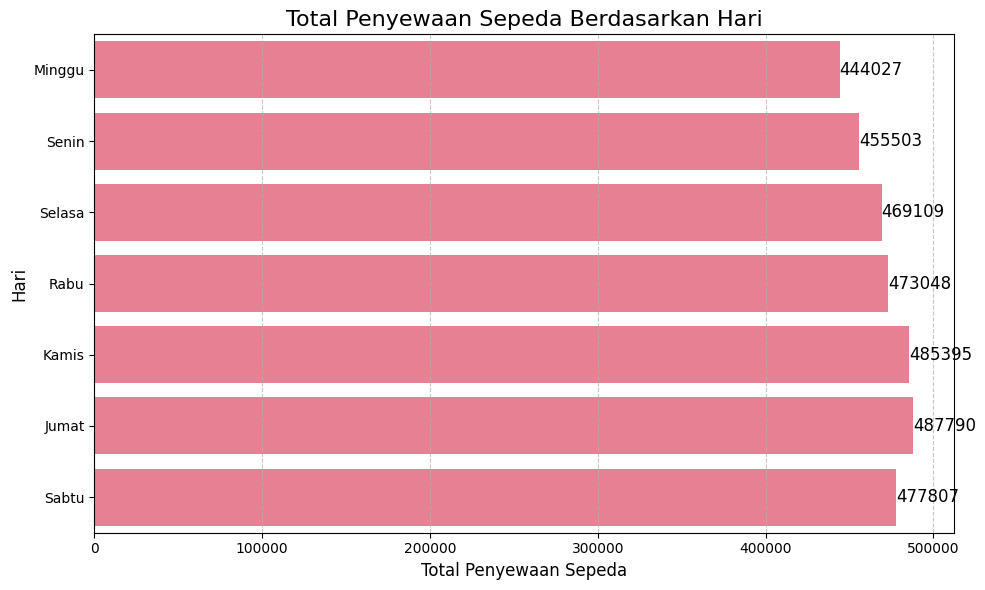

In [31]:
# Visualisasi penyewaan sepeda perhari
# Mengatur palet warna
sns.set_palette("husl")

# Membuat visualisasi dengan barplot horizontal
plt.figure(figsize=(10, 6))
barplot = sns.barplot(y='day', x='sum', data=weekday_loan)

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     color='black', fontsize=12)

plt.title('Total Penyewaan Sepeda Berdasarkan Hari', fontsize=16)
plt.xlabel('Total Penyewaan Sepeda', fontsize=12)
plt.ylabel('Hari', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

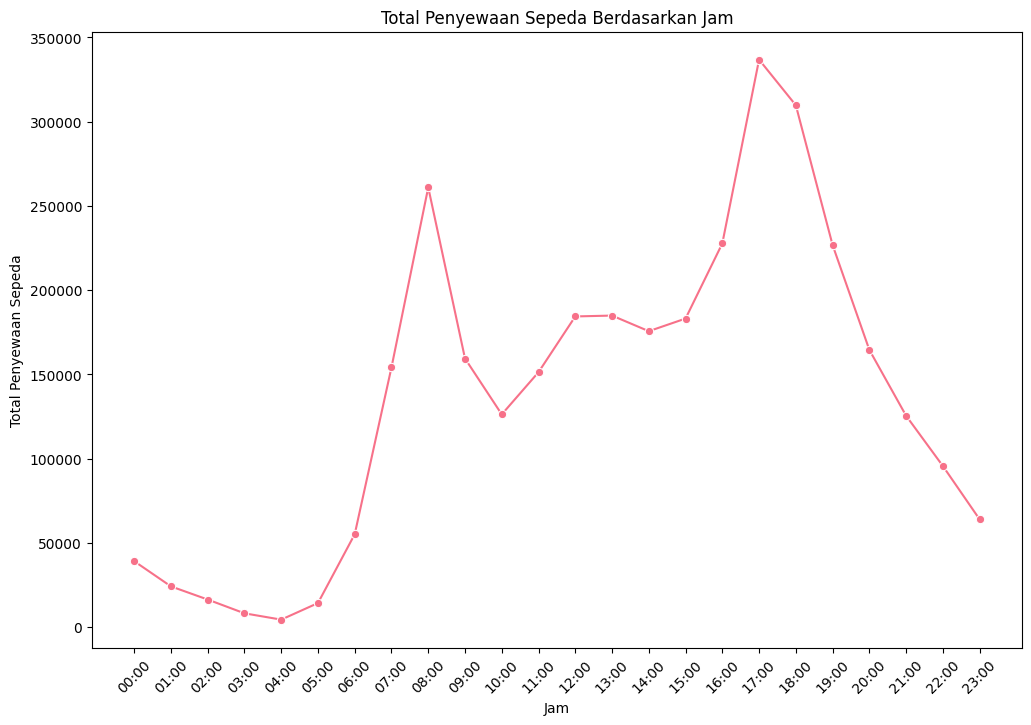

In [32]:
# Visualisasi penyewaan sepeda berdasarkan jam
plt.figure(figsize=(12, 8))
sns.lineplot(x='hour', y='count_total', data=hourly_rentals, marker="o")
plt.title('Total Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

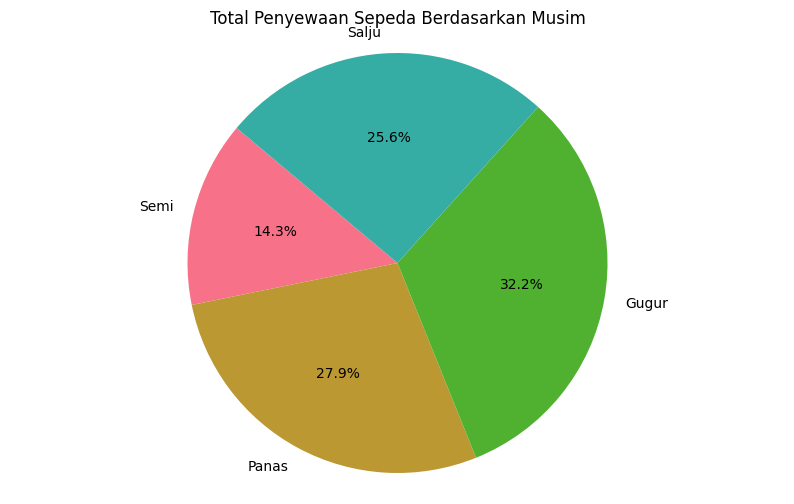

In [33]:
# Misalkan 'season_rentals' adalah DataFrame yang sudah ada
# Hitung total penyewaan sepeda berdasarkan musim
season_counts = season_loan.groupby('season', observed=False)['count_total'].sum()

# Buat pie chart
plt.figure(figsize=(10, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Penyewaan Sepeda Berdasarkan Musim')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

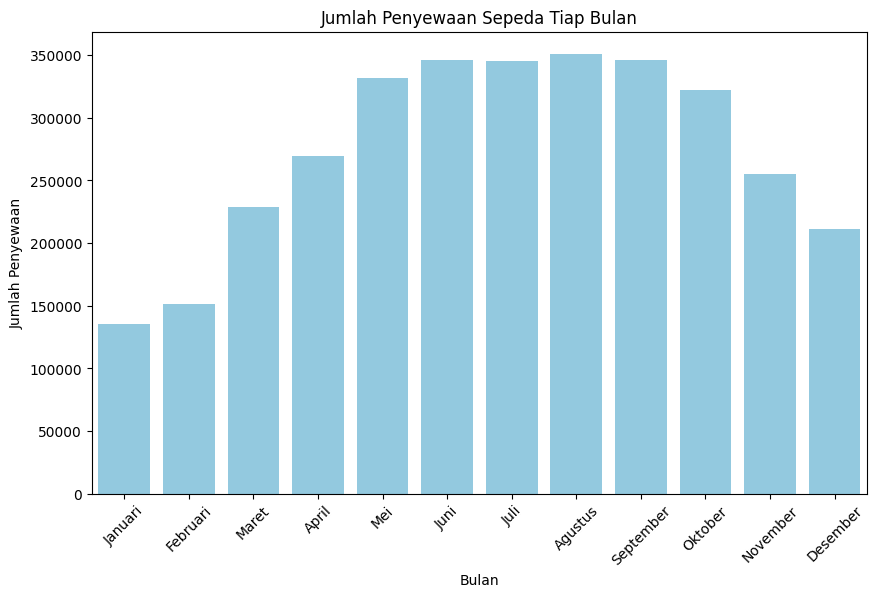

In [37]:
# Visualisasi sepeda tiap bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count_total', data=monthly_loan, color='skyblue')  # Menggunakan warna solid
plt.title('Jumlah Penyewaan Sepeda Tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)  # Memutar label bulan jika perlu
plt.show()

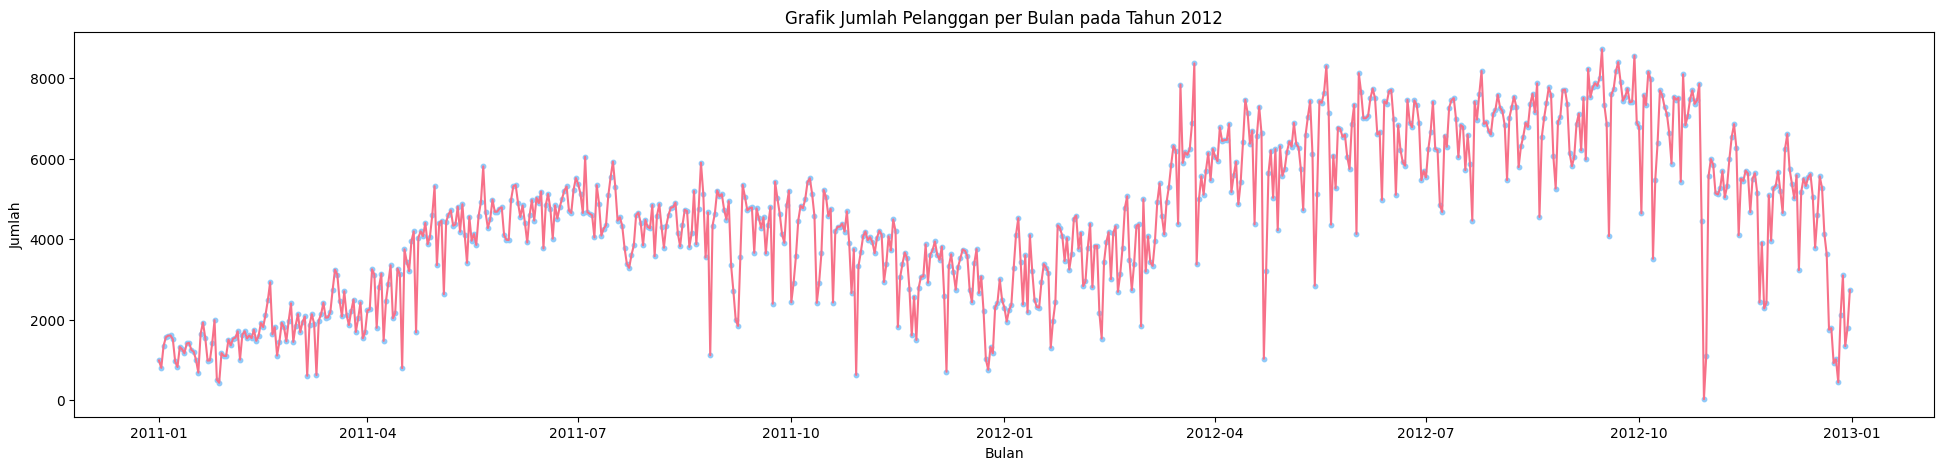

In [35]:
# mmebuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_total'].groupby(day_df['date_day']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

# menampilkan plot
plt.show()

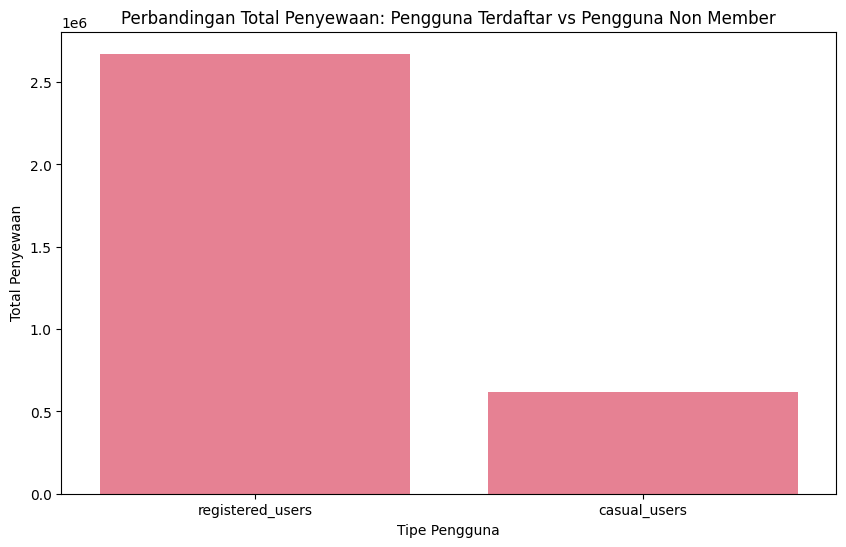

In [36]:
# Visualisasi perbandingan pengguna terdaftar dan kasual
plt.figure(figsize=(10, 6))
sns.barplot(x='user_type', y='total_rentals', data=subscription_rentals, legend=False)
plt.title('Perbandingan Total Penyewaan: Pengguna Terdaftar vs Pengguna Non Member')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Total Penyewaan')
plt.show()

## Conclusion

- **Most Borrowed Day and Least Borrowed Day**
  - The highest rental day is **Friday**, with a total rental of **487,790**.
  - The lowest rental day is **Sunday**, with a total rental of **444,027**.

- **Most Popular Season for Bike Rentals**
  - The season with the highest bike rental volume is **Autumn**, with a total of **1,061,129** rentals.

- **Peak Hour for Bike Rentals**
  - The busiest hour for bike rentals is **5:00 PM**, with a total rental count of **336,860**.

- **Impact of Months on Bike Rentals**
  - Monthly bike rental counts are as follows:
    - January: **134,933**
    - February: **151,352**
    - March: **228,920**
    - April: **269,094**
    - May: **331,686**
    - June: **346,342**
    - July: **344,948**
    - August: **351,194**
    - September: **345,991**
    - October: **322,352**
    - November: **254,831**
    - December: **211,036**

- **Comparison of Registered vs. Casual Users**
  - Total bike rentals for registered and casual users:
    - Registered Users: **2,672,662**
    - Casual Users: **620,017**
  - There are more rentals from **registered users** compared to **casual users**.